In [1]:
#imports
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [15]:
temp_5814= xr.open_dataset("/nobackup/users/ommeren/full_pacific_ocean_temperature_monthly_anomalies_58-14.nc")
temp_1518= xr.open_dataset("/nobackup/users/ommeren/full_pacific_ocean_temperature_monthly_anomalies_15-18.nc")
temp_1923= xr.open_dataset("/nobackup/users/ommeren/full_pacific_ocean_temperature_monthly_anomalies_19-23.nc")

temp_ma = xr.concat([temp_5814, temp_1518, temp_1923], dim="time")
temp_ma



<xarray.Dataset>
Dimensions:   (deptht: 38, lat: 180, lon: 170, time: 792)
Coordinates:
  * deptht    (deptht) float32 1.556 2.668 3.856 5.14 ... 370.7 411.8 457.6
  * lat       (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon       (lon) float64 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5
  * time      (time) datetime64[ns] 1958-01-01 1958-02-01 ... 2023-12-01
Data variables:
    votemper  (time, deptht, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0

In [16]:
nino34_subset = temp_ma.sel(deptht=0, method="nearest")

In [21]:
#setting the min and max lat and lon for the nino 34 area
lat_min, lat_max = -5, 5
lon_min, lon_max = 190, 240

#creating a mask for the 2D data 
mask = ((nino34_subset.lat >= lat_min) & (nino34_subset.lat <= lat_max) &
        (nino34_subset.lon >= lon_min) & (nino34_subset.lon <= lon_max)).compute()

#Placing the mask on the data
nino34_region = nino34_subset.where(mask, drop=True)
nino34_region

<xarray.Dataset>
Dimensions:   (time: 792, lat: 10, lon: 50)
Coordinates:
    deptht    float32 1.556
  * lat       (lat) float64 -4.5 -3.5 -2.5 -1.5 -0.5 0.5 1.5 2.5 3.5 4.5
  * lon       (lon) float64 190.5 191.5 192.5 193.5 ... 236.5 237.5 238.5 239.5
  * time      (time) datetime64[ns] 1958-01-01 1958-02-01 ... 2023-12-01
Data variables:
    votemper  (time, lat, lon) float32 1.004 1.044 1.016 ... 0.9031 0.9498 1.093

In [10]:
nino34_region_subset = nino34_region.sel(time=slice("1969-01-16", "1986-12-16"))

In [31]:
# Step 1: Calculate the mean SST in the Nino3.4 region
area_avg_sst = nino34_region.votemper.mean(dim=['lat', 'lon'])

# Step 2: Compute the monthly climatology
monthly_climatology = area_avg_sst.groupby('time.month').mean(dim='time')

# Step 3: Calculate anomalies
anomalies = area_avg_sst.groupby('time.month') - monthly_climatology

# Step 4: Compute yearly averages of anomalies
yearly_anomalies = anomalies.resample(time='1YE').mean()

# Step 5: STANDARDIZE the anomalies here
standardized_anomalies = (yearly_anomalies - yearly_anomalies.mean()) / yearly_anomalies.std()



In [32]:
standardized_anomalies = standardized_anomalies.compute()

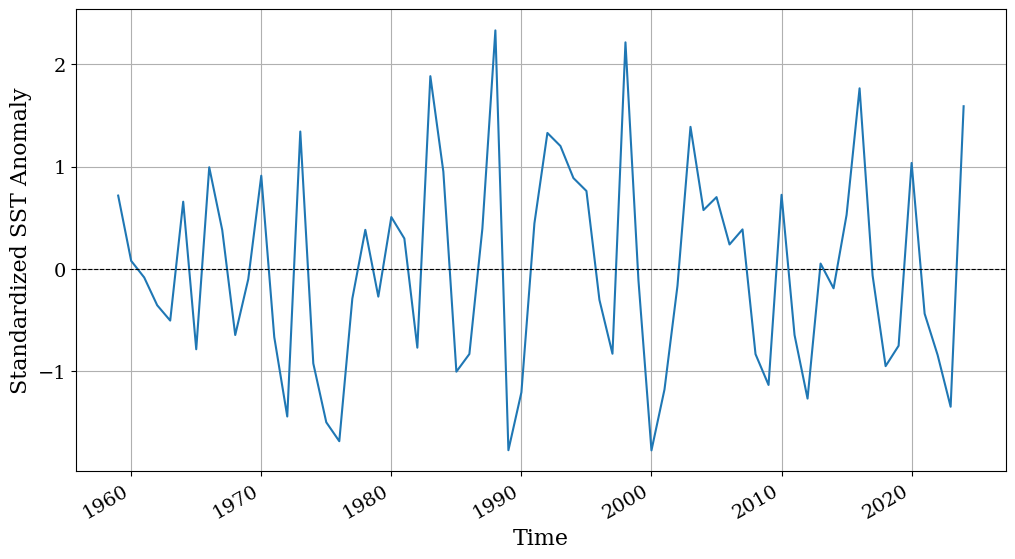

In [39]:
plt.figure(figsize=(12, 6))

# Plot the standardized anomalies
standardized_anomalies.plot()

# Update fonts and sizes
plt.xlabel('Time', fontsize=16, fontname='serif')
plt.ylabel('Standardized SST Anomaly', fontsize=16, fontname='serif')
plt.xticks(fontsize=14, fontname='serif')
plt.yticks(fontsize=14, fontname='serif')

# Add zero line and grid
plt.axhline(0, color='black', lw=0.8, ls='--')
plt.grid(True)

plt.savefig('nino34_standardized_anomalies.png', dpi=300, bbox_inches='tight')

plt.show()
